# 0.04 Examine Surrogate Data
#### 09/12/2022, JX
> Please show me data

In [16]:
from starling_rhythm.utils.paths import PROCESSED_DIR

In [17]:
import pandas as pd

In [18]:
SAVE_PATH = PROCESSED_DIR / 'starling_zenodo_2019_amp_envs_MF_IAAFT200_FULL.pickle'
ae_df = pd.read_pickle(SAVE_PATH)

In [19]:
ae_df

,bID,wav_file,amp_env,h_expo,MF_range,mf_iaaft_range
0,b1053,2017-11-13_16-29-28-410000.wav,"[0.009873399510979652, 0.015623422339558601, 0...","[1.528071866963577, 1.0370111976118286, 0.8437...",1.011097,"[0.9276718685714906, 0.9171483752163467, 0.944..."
1,b1053,2017-11-16_15-17-52-520000.wav,"[0.0003380597336217761, 0.00034135428722947836...","[1.1938116698829084, 1.0984076594608625, 1.032...",0.351719,"[0.28812645556733407, 0.3255784330799333, 0.31..."
2,b1053,2017-11-20_14-15-32-360000.wav,"[2.641892910003662, 2.6070051193237305, 2.5947...","[1.1806910145575205, 1.0637405119967855, 0.977...",0.426110,"[0.3144035067800034, 0.2852736875864027, 0.317..."
3,b1053,2017-11-20_12-40-56-130000.wav,"[3.971318801632151e-05, 3.945435310015455e-05,...","[1.1870676604975956, 1.0644852178050632, 0.983...",0.416832,"[0.30861717466345995, 0.28864976695326583, 0.3..."
4,b1053,2017-11-15_15-30-01-000000.wav,"[0.005851297173649073, 0.49159008264541626, 1....","[1.1330045795095076, 1.0547100658878008, 0.984...",0.376517,"[0.3876441965284274, 0.3354107561595341, 0.246..."
...,...,...,...,...,...,...
10495,b1145,2017-11-09_13-26-01-740000.wav,"[0.0003850629145745188, 0.0003816374228335917,...","[1.180004894319496, 1.0197033102020214, 0.9132...",0.545500,"[0.3514270190757175, 0.32709049219820485, 0.37..."
10496,b1145,2017-11-07_17-30-06-880000.wav,"[0.00022515977616421878, 0.0001997244544327259...","[1.2047430508822017, 1.0585859494621113, 0.943...",0.611907,"[0.5688644655873416, 0.44159948357619083, 0.41..."
10497,b1145,2017-11-09_09-34-49-120000.wav,"[0.004488207399845123, 1.2879040241241455, 3.4...","[1.28912933912076, 1.1004097813293756, 0.96728...",0.661470,"[0.45379276220452824, 0.3641418002581174, 0.41..."
10498,b1145,2017-11-09_09-26-04-120000.wav,"[0.00029243348399177194, 0.0002883640117943287...","[1.260354642359515, 1.0466296263441792, 0.9064...",0.669632,"[0.4373893471223834, 0.4469140843113437, 0.474..."


## Parse t-statistics

In [20]:
import scipy.stats as stats
import numpy as np

In [21]:
ts = []
p = []
for MF_range, mf_iaaft_range in zip(ae_df['MF_range'].values, ae_df['mf_iaaft_range']):
    test = stats.ttest_1samp(mf_iaaft_range, MF_range)
    ts.append(-test[0])
    p.append(test[1])
    
ae_df['ts'] = ts
ae_df['p'] = p

In [22]:
import statsmodels.stats.multitest

In [23]:
bonferroni = statsmodels.stats.multitest.multipletests(ae_df['p'].values, alpha = 0.05, method = 'bonferroni')
ae_df['sig'] = bonferroni[0]
ae_df['bonf_p'] = bonferroni[1]

In [24]:
ae_df.head()

,bID,wav_file,amp_env,h_expo,MF_range,mf_iaaft_range,ts,p,sig,bonf_p
0,b1053,2017-11-13_16-29-28-410000.wav,"[0.009873399510979652, 0.015623422339558601, 0...","[1.528071866963577, 1.0370111976118286, 0.8437...",1.011097,"[0.9276718685714906, 0.9171483752163467, 0.944...",15.573756,3.307088e-16,True,3.472112e-12
1,b1053,2017-11-16_15-17-52-520000.wav,"[0.0003380597336217761, 0.00034135428722947836...","[1.1938116698829084, 1.0984076594608625, 1.032...",0.351719,"[0.28812645556733407, 0.3255784330799333, 0.31...",13.877060,7.641647e-15,True,8.022965e-11
2,b1053,2017-11-20_14-15-32-360000.wav,"[2.641892910003662, 2.6070051193237305, 2.5947...","[1.1806910145575205, 1.0637405119967855, 0.977...",0.426110,"[0.3144035067800034, 0.2852736875864027, 0.317...",28.399127,9.336860e-24,True,9.802769e-20
3,b1053,2017-11-20_12-40-56-130000.wav,"[3.971318801632151e-05, 3.945435310015455e-05,...","[1.1870676604975956, 1.0644852178050632, 0.983...",0.416832,"[0.30861717466345995, 0.28864976695326583, 0.3...",28.056127,1.342316e-23,True,1.409298e-19
4,b1053,2017-11-15_15-30-01-000000.wav,"[0.005851297173649073, 0.49159008264541626, 1....","[1.1330045795095076, 1.0547100658878008, 0.984...",0.376517,"[0.3876441965284274, 0.3354107561595341, 0.246...",9.375222,1.461871e-10,True,1.534819e-06


In [33]:
select = ae_df[['bID', 'ts']]
select['type'] = 'bird'

/tmp/ipykernel_27568/2026608030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select['type'] = 'bird'


In [34]:
select

,bID,ts,type
0,b1053,15.573756,bird
1,b1053,13.877060,bird
2,b1053,28.399127,bird
3,b1053,28.056127,bird
4,b1053,9.375222,bird
...,...,...,...
10495,b1145,29.623825,bird
10496,b1145,22.750894,bird
10497,b1145,18.094426,bird
10498,b1145,52.091720,bird


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorednoise as cn

In [45]:
colors = []
sigs = []

## for every color
for beta, color in zip([0], ['white']):
    ## generate 100
    for n in np.arange(0, 100):
        samples = 1200000 # number of samples to generate
        sigs.append(cn.powerlaw_psd_gaussian(beta, samples))
        colors.append(color)

In [46]:
noises = pd.DataFrame(
    {
        'colors' : colors,
        'sigs' : sigs
    }
)

In [47]:
noises

,colors,sigs
0,white,"[-0.28228701653266924, 0.5939169245957157, 0.3..."
1,white,"[-1.0959108016546164, 0.2608130744137999, 0.51..."
2,white,"[-0.2641642267917176, 1.368024977632123, 0.470..."
3,white,"[0.8930773233501756, -0.5533704532938751, 0.21..."
4,white,"[-0.1093692029568959, -1.0315158941352325, 0.1..."
...,...,...
95,white,"[-1.2553087058995782, 1.8976414707284117, 0.52..."
96,white,"[0.5972327750989563, -0.8288111824968247, 1.78..."
97,white,"[-1.8684727718003484, 3.055215311875679, 0.554..."
98,white,"[-0.5798958380665591, 2.078722658315676, 1.890..."


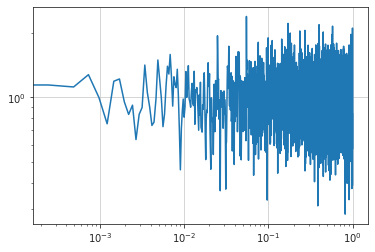

In [52]:
# optionally plot the Power Spectral Density with Matplotlib
from matplotlib import mlab
from matplotlib import pylab as plt

y = noises[noises['colors'] == 'white'].sigs.values[0]

s, f = mlab.psd(y, NFFT=2**13)
plt.loglog(f,s)
plt.grid(True)
plt.show()

In [48]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

In [49]:
from starling_rhythm.mfdfa import tmf
n_jobs = 42
verbose = 0

In [50]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    tmfs = parallel(
        delayed(tmf)(
            address,
            ns = 32,
            amp_env_sr = 200,
            hilbert_artifacts = True
        )
        for address in tqdm(noises['sigs'], desc = 'getting all the real ones')
    )

getting all the real ones: 100%|██████████| 100/100 [00:10<00:00,  9.58it/s]


In [56]:
noise_df = pd.DataFrame(
    {'ts':tmfs}
)

In [60]:
noise_df['bID'] = 'white'
noise_df['type'] = 'noise'

In [63]:
amal = pd.concat([noise_df, select])

In [87]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [88]:
mean_confidence_interval(tmfs)[2]

5.083304572771683

## constant tone?

In [109]:
freq = []
sines = []
for i in tqdm(np.arange(1, 101)):
    start_time = 0
    end_time = 10
    sample_rate = 48000
    time = np.arange(start_time, end_time, 1/sample_rate)
    theta = 0
    frequency = 100 * i
    freq.append(frequency)
    amplitude = 1
    sinewave = amplitude * np.sin(2 * np.pi * frequency * time + theta)
    sines.append(sinewave)

100%|██████████| 100/100 [00:02<00:00, 40.29it/s]


In [110]:
sines = pd.DataFrame(
    {
        'freq' : freq,
        'sine' : sines
    }
)

In [111]:
sines

,freq,sine
0,100,"[0.0, 0.01308959557134444, 0.02617694830787315..."
1,200,"[0.0, 0.02617694830787315, 0.05233595624294383..."
2,300,"[0.0, 0.03925981575906861, 0.07845909572784494..."
3,400,"[0.0, 0.05233595624294383, 0.10452846326765346..."
4,500,"[0.0, 0.06540312923014306, 0.13052619222005157..."
...,...,...
95,9600,"[0.0, 0.9510565162951535, 0.5877852522924732, ..."
96,9700,"[0.0, 0.9550199444571865, 0.5664062369248332, ..."
97,9800,"[0.0, 0.958819734868193, 0.5446390350150273, -..."
98,9900,"[0.0, 0.9624552364536473, 0.5224985647159489, ..."


In [112]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    tmfs = parallel(
        delayed(tmf)(
            address,
            ns = 32,
            amp_env_sr = 200,
            hilbert_artifacts = True
        )
        for address in tqdm(sines['sine'], desc = 'getting all the real ones')
    )

getting all the real ones: 100%|██████████| 100/100 [00:23<00:00,  4.29it/s]


In [113]:
tmfs

[26.862874638157475,
 18.846360897836348,
 22.67700831466748,
 22.693120854407407,
 23.66380997347183,
 21.76389709457056,
 17.969385406431353,
 15.1182705988871,
 15.201603086213845,
 18.23335828294744,
 15.655090399381086,
 16.990703010216208,
 15.695885416827332,
 13.450865746596287,
 16.894658562796295,
 14.672542585692037,
 16.269993145783438,
 14.861371684256639,
 17.35526493909617,
 17.983341849613904,
 16.818761791270536,
 15.406058407339488,
 15.5832598978383,
 17.12614652734233,
 16.618238862522983,
 17.229408497541687,
 15.172506539059894,
 19.686081731970596,
 15.000707550954859,
 13.971144282426975,
 12.71461394844743,
 15.134731598496519,
 16.395241308738356,
 14.752868414396808,
 14.574286579048923,
 15.166452492638975,
 14.988550904651355,
 15.752378093174352,
 17.112517201918372,
 13.238486113284262,
 12.34147550144651,
 15.069877428077204,
 15.222665963923156,
 15.054379059867745,
 13.724426577456624,
 14.11926722281931,
 13.62541998482982,
 14.446180747603819,
 15.39

## t-statistic inquiries

In [89]:
## plot shuffle against shuffle

In [90]:
### Out of 10499 bouts, how many are significantly multifractal?
np.unique(ae_df['sig'].values, return_counts = True) 

(array([False,  True]), array([  137, 10362]))

In [91]:
sum(ae_df['ts'] > mean_confidence_interval(tmfs)[2])

10395

In [96]:
10395/10499

0.9900942946947329

Text(0.5, 0, 't_MF')

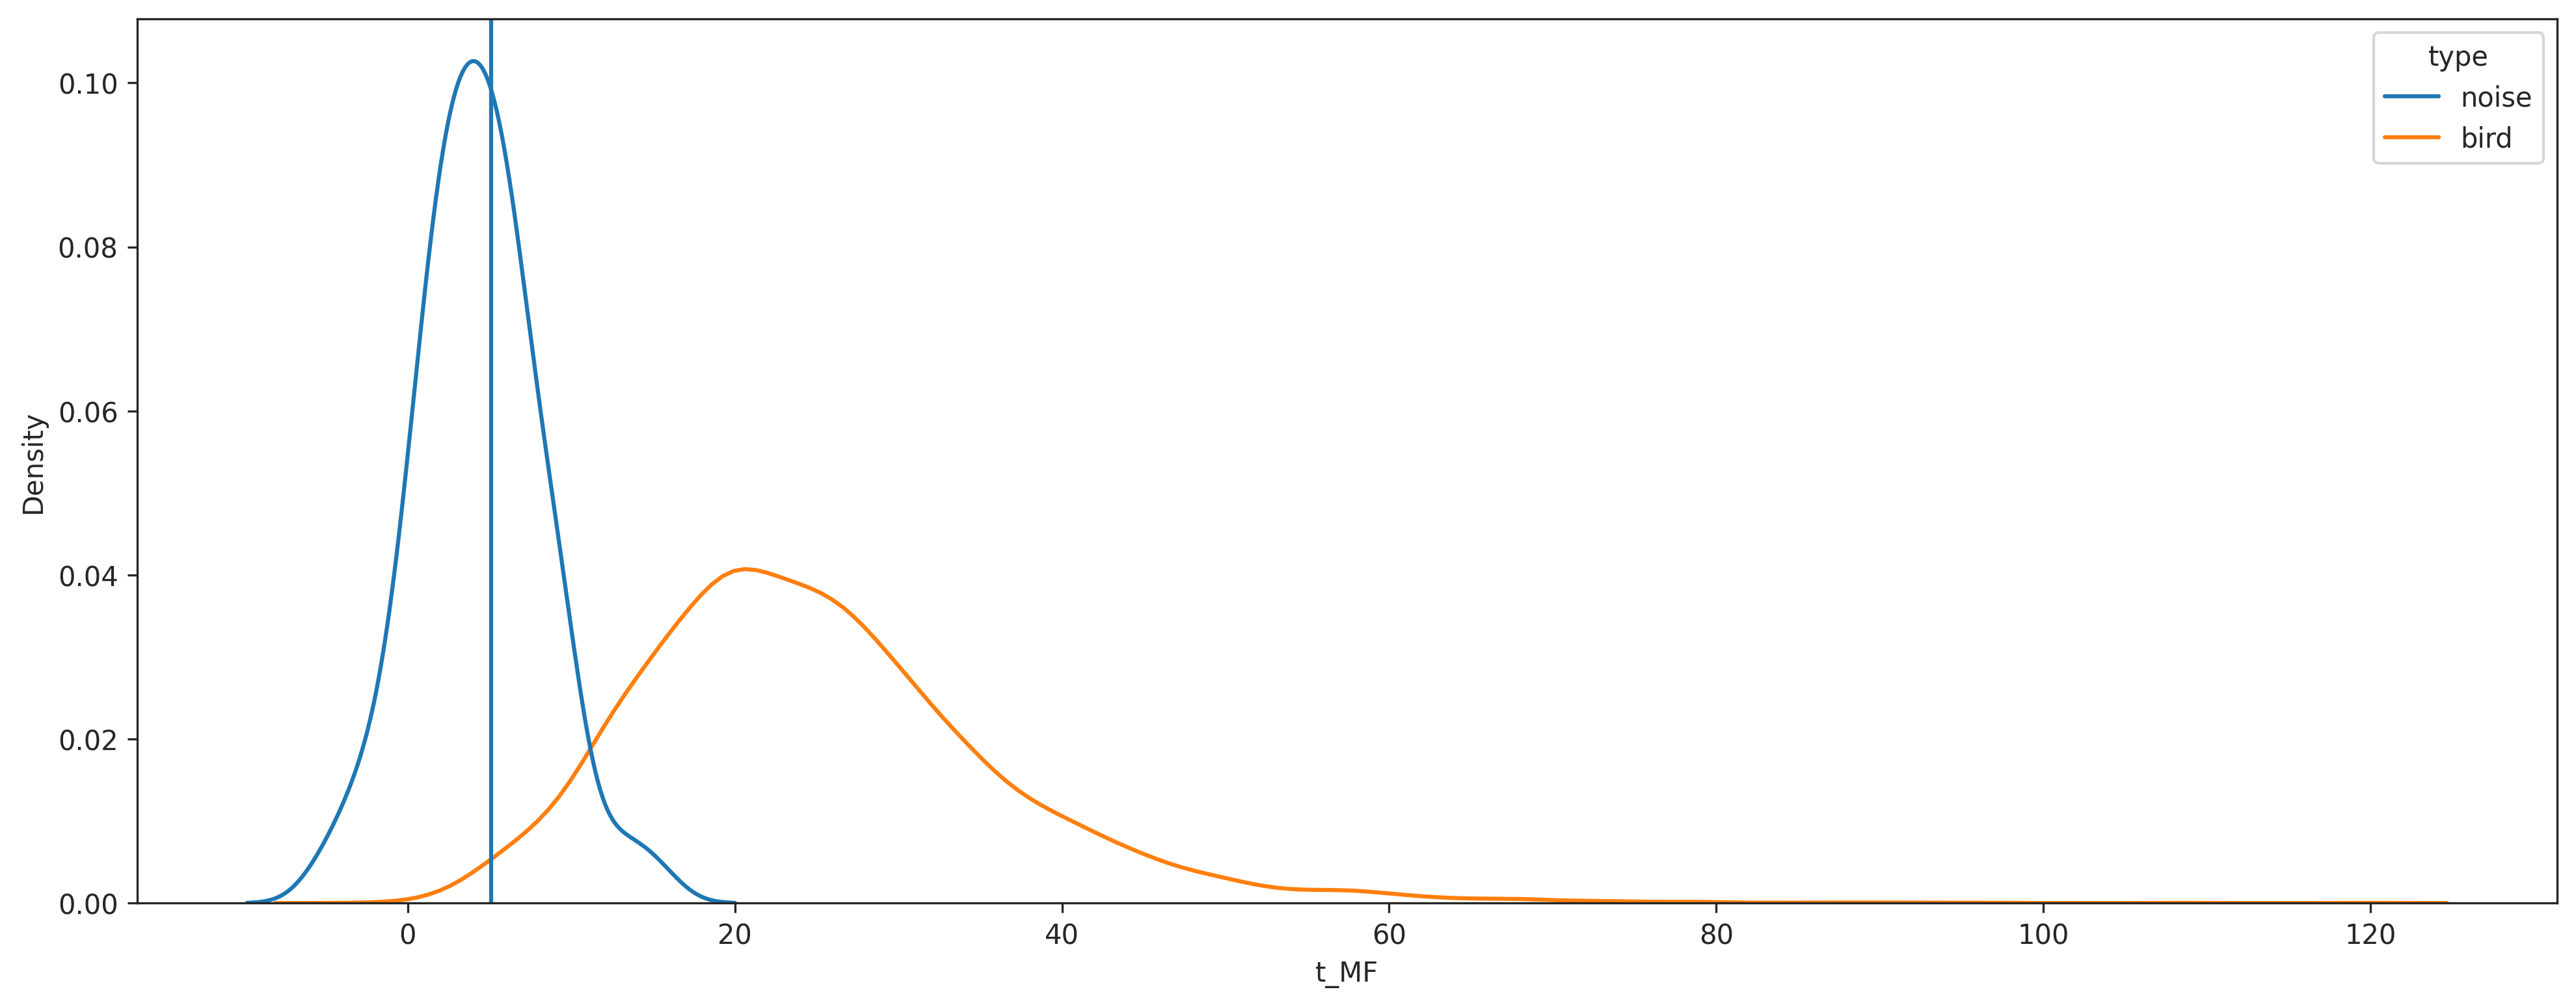

In [94]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')



sns.kdeplot(data = amal.reset_index(), x = 'ts', color = 'black', hue = 'type', common_norm = False)

plt.axvline(x=mean_confidence_interval(tmfs)[2])
plt.xlabel('t_MF')

Text(0.5, 0, 't_MF')

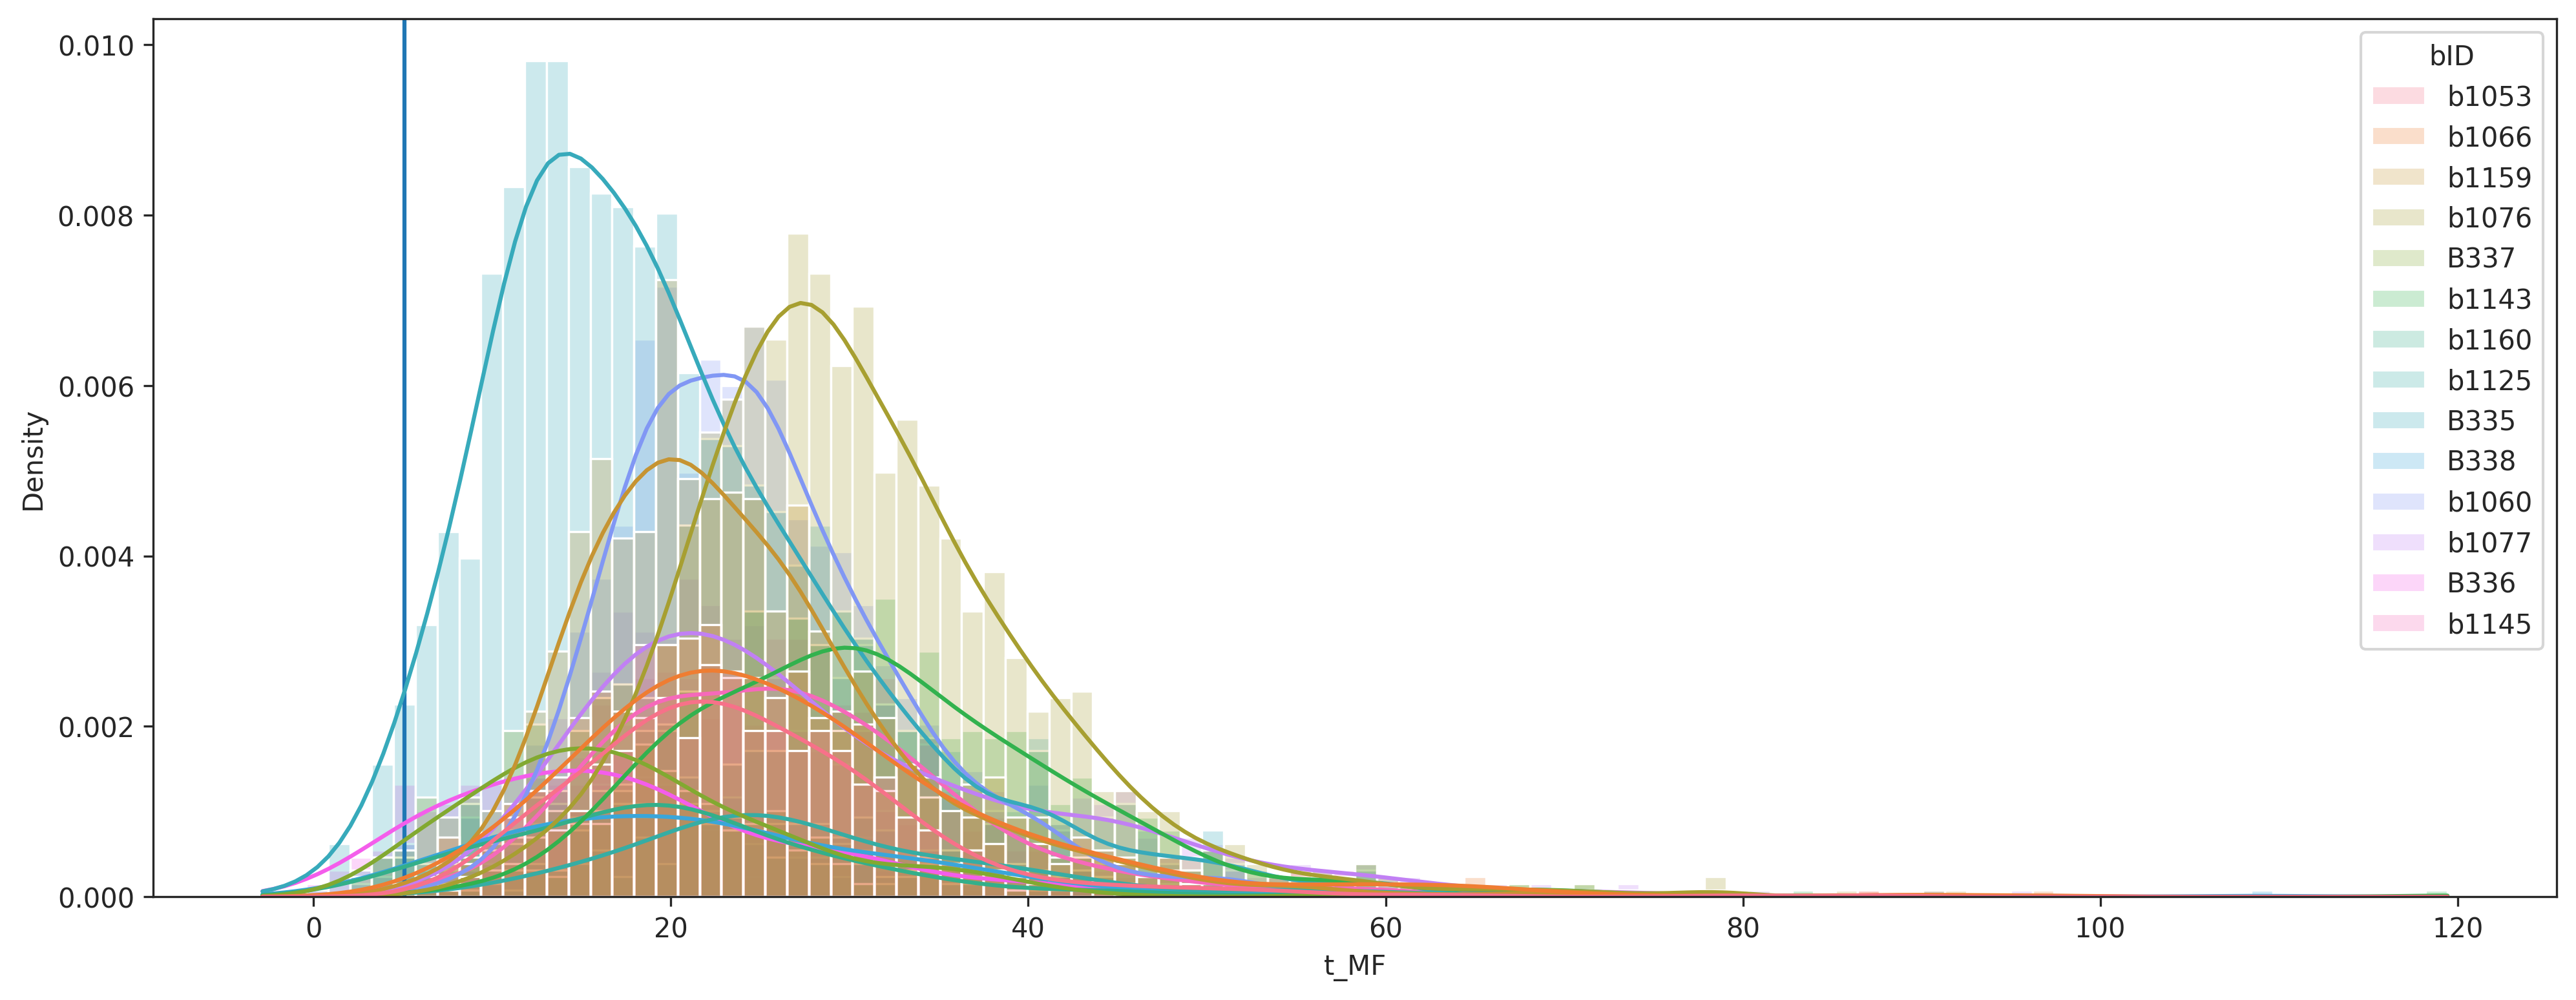

In [95]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')

plt.axvline(x=mean_confidence_interval(tmfs)[2])
sns.histplot(data = ae_df, x = 'ts', stat = 'density', hue = 'bID', color = 'bID', alpha = 0.25, kde = True)
plt.xlabel('t_MF')

## Rank Order

In [14]:
bird_average = []

for bID in np.unique(ae_df['bID'].values):
    subframe = ae_df[ae_df['bID'] == bID]
    bird_average.append([np.mean(subframe['ts']), bID])

In [15]:
bird_average.sort()
bird_average

[[-31.443030913661907, 'b1143'],
 [-30.428177482154993, 'b1076'],
 [-28.156698046285456, 'b1077'],
 [-28.04865068072689, 'b1125'],
 [-26.68926969018661, 'b1066'],
 [-26.381925458785137, 'b1145'],
 [-24.893645088619216, 'b1060'],
 [-24.20041542812753, 'b1053'],
 [-24.037205885067344, 'b1159'],
 [-21.935393877378505, 'B338'],
 [-20.620542071515537, 'b1160'],
 [-19.83798373187222, 'B335'],
 [-17.957351476266194, 'B337'],
 [-17.40473464079037, 'B336']]

## Pull out three cohorts: monofractal, low multifractal, high multifractal

### mono

In [16]:
mono = ae_df[ae_df['sig'] == False]

In [17]:
np.unique(mono['bID'].values, return_counts = True)

(array(['B335', 'B336', 'B337', 'B338', 'b1060', 'b1066', 'b1077', 'b1145',
        'b1159', 'b1160'], dtype=object),
 array([61, 34, 14, 10,  1,  2,  1,  3,  1, 10]))

In [18]:
np.mean(mono.ts)

-3.9364605969113557

In [19]:
mono_selected = mono.sort_values(by = 'ts', ascending=False)[:10]

In [20]:
mono_selected

,bID,wav_file,amp_env,h_expo,MF_range,mf_iaaft_range,ts,p,sig,bonf_p
6862,B335,2008-06-03_05-17-00-000000.wav,"[0.0002483963326085359, 0.13896213471889496, 0...","[1.0218516404905311, 0.9467228504976248, 0.894...",0.322541,"[0.3484327397604955, 0.30488905922085563, 0.27...",2.859374,0.007527,False,1.0
6004,B335,2008-06-18_05-54-00-000000.wav,"[0.0020253732800483704, 1.2484756708145142, 3....","[1.0942529014205076, 0.9979940956181037, 0.930...",0.355692,"[0.3980595384915172, 0.3751739502972977, 0.435...",0.583158,0.564005,False,1.0
9804,B336,2008-06-30_12-14-00-000000.wav,"[0.5741668343544006, 0.8141220808029175, 0.885...","[1.1609626665214963, 1.0799021002757516, 1.029...",0.277422,"[0.22357577128063855, 0.3081036821653619, 0.33...",0.294075,0.770661,False,1.0
9653,B336,2008-07-03_07-13-00-000000.wav,"[2.958448886871338, 2.2301368713378906, 1.9980...","[1.133241948010946, 1.0685082019417627, 1.0184...",0.291733,"[0.3216390300505464, 0.32271175126774065, 0.21...",-0.204977,0.838930,False,1.0
5861,B335,2008-06-05_07-06-00-000000.wav,"[0.4747650921344757, 0.7139626741409302, 0.917...","[1.151847335999829, 1.0760182931100328, 1.0231...",0.300361,"[0.2996147791709486, 0.2743425515307809, 0.376...",-0.288912,0.774572,False,1.0
7171,B335,2008-06-10_01-48-00-000000.wav,"[2.387779712677002, 3.147059440612793, 3.94631...","[1.134506833379174, 1.0468093533462506, 0.9857...",0.321187,"[0.3388276413179919, 0.30729324045269, 0.37536...",-1.094286,0.282259,False,1.0
5734,B335,2008-06-13_04-43-00-000000.wav,"[0.3868618607521057, 0.31490761041641235, 0.17...","[1.1619598054762115, 1.0634213504701162, 1.005...",0.324925,"[0.30533923222265813, 0.3274776619284715, 0.27...",-1.151393,0.258374,False,1.0
5987,B335,2008-05-09_16-07-00-000000.wav,"[0.00039131889934651554, 0.2830059826374054, 0...","[1.1507733245844078, 1.089061782759079, 1.0397...",0.337943,"[0.42718611184960464, 0.37601627441785557, 0.2...",-1.308678,0.200263,False,1.0
9658,B336,2008-06-09_21-48-00-000000.wav,"[2.9336252212524414, 2.9727210998535156, 3.200...","[1.1535719365635788, 1.0562417783084936, 0.994...",0.318014,"[0.3606702697071329, 0.35340536514559984, 0.31...",-1.478453,0.149376,False,1.0
5830,B335,2008-06-16_00-59-00-000000.wav,"[0.00946671050041914, 3.0352940559387207, 5.84...","[1.1025741226424712, 1.0094609041381934, 0.947...",0.311817,"[0.2981380170725718, 0.2867740411160752, 0.342...",-1.661749,0.106645,False,1.0


### low

In [21]:
MF = ae_df[ae_df['sig'] != False] ## remove or 

In [22]:
MF_low_selected = MF.sort_values(by = 'ts', ascending=False)[:10]

In [23]:
MF_low_selected

,bID,wav_file,amp_env,h_expo,MF_range,mf_iaaft_range,ts,p,sig,bonf_p
6587,B335,2008-06-18_18-48-00-000000.wav,"[0.0001490008580731228, 0.012770825996994972, ...","[1.1134150830879577, 1.0274998180253765, 0.956...",0.393611,"[0.32441408772612734, 0.3124617059449224, 0.28...",-5.527345,0.000005,True,0.049706
5082,b1160,2017-11-18_14-08-51-770000.wav,"[0.05088985711336136, 0.03217846155166626, 0.0...","[1.1887552245427697, 1.118700232522494, 1.0707...",0.245799,"[0.25674037366980507, 0.21904520322000176, 0.2...",-5.540556,0.000005,True,0.047859
7283,B338,2008-04-18_16-53-00-000000.wav,"[0.008530798368155956, 3.002629041671753, 5.44...","[1.1303976174932426, 1.0454122021122614, 0.983...",0.340732,"[0.2674959792261957, 0.20565798196646246, 0.23...",-5.554107,0.000004,True,0.046037
3833,B337,2008-06-08_20-22-00-000000.wav,"[0.0026955334469676018, 0.6312301158905029, 2....","[1.1101800628616278, 1.0240886877296131, 0.965...",0.294191,"[0.25726573313604095, 0.26982299584160474, 0.2...",-5.590854,0.000004,True,0.041438
9841,B336,2008-06-04_22-27-00-000000.wav,"[0.045208998024463654, 0.04468867927789688, 0....","[1.136502125191682, 1.0596032778056965, 1.0058...",0.318639,"[0.2842587448814844, 0.30246461395702284, 0.29...",-5.591872,0.000004,True,0.041318
3844,B337,2008-05-03_18-10-00-000000.wav,"[0.0063875587657094, 2.9897239208221436, 9.415...","[1.1419098920527082, 1.0608019940930746, 1.006...",0.305455,"[0.22663293143981134, 0.28057734551255586, 0.3...",-5.621572,0.000004,True,0.037950
4997,b1160,2017-11-18_16-25-53-030000.wav,"[7.947113772388548e-05, 0.00010796977585414425...","[1.1543438268552912, 1.06297715186592, 0.99502...",0.338766,"[0.2889959635052721, 0.3316389810653605, 0.306...",-5.623400,0.000004,True,0.037752
5901,B335,2008-05-20_07-35-00-000000.wav,"[0.00037112919380888343, 0.39853566884994507, ...","[1.1609544627500195, 1.0713820046476314, 1.003...",0.356854,"[0.4203528117779133, 0.31748793316633483, 0.25...",-5.623674,0.000004,True,0.037722
7397,B338,2008-05-07_14-21-00-000000.wav,"[0.00028729537734761834, 0.06597098708152771, ...","[1.1054216253155242, 1.022261625043497, 0.9657...",0.326557,"[0.32366192012398864, 0.3008653688562172, 0.27...",-5.663538,0.000003,True,0.033655
7337,B338,2008-06-06_12-59-00-000000.wav,"[5.495859622955322, 5.039600372314453, 6.05783...","[1.1245735155110788, 1.0405369904169024, 0.983...",0.297659,"[0.28533851912732455, 0.2139637957314614, 0.27...",-5.682724,0.000003,True,0.031858


### 0.05-0.1 quartile

In [24]:
MF['t_rank'] = MF['ts'].rank(pct = True)

/tmp/ipykernel_33304/492550954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MF['t_rank'] = MF['ts'].rank(pct = True)


In [25]:
MF_mid_selected = MF[(MF['t_rank'] > 0.05) & (MF['t_rank'] < 0.1)].sort_values(by = 'ts', ascending = True)[:10]

In [26]:
MF_mid_selected

,bID,wav_file,amp_env,h_expo,MF_range,mf_iaaft_range,ts,p,sig,bonf_p,t_rank
3212,b1076,2017-08-25_19-27-50-760000.wav,"[7.813112461008132e-05, 8.94358308869414e-05, ...","[1.1345378355441391, 1.0316800081749264, 0.951...",0.408953,"[0.2952632688390331, 0.2740242068204606, 0.286...",-44.859499,9.153488e-30,True,9.610247e-26,0.050087
3222,b1076,2017-09-03_14-00-41-990000.wav,"[0.2836436927318573, 0.16074612736701965, 0.11...","[1.1741651582230195, 1.0628455705431756, 0.984...",0.368054,"[0.24833734898341941, 0.2154698527564266, 0.24...",-44.847820,9.226581e-30,True,9.686988e-26,0.050183
1073,b1066,2017-11-07_11-44-56-320000.wav,"[0.06197666376829147, 0.04244512319564819, 0.0...","[1.4538917422418283, 1.0883115724334405, 0.888...",0.914241,"[0.6959860178449413, 0.7455304334604747, 0.709...",-44.847801,9.226697e-30,True,9.687109e-26,0.050280
9462,b1077,2017-12-19_08-30-35-140000.wav,"[0.00021747403661720455, 0.016489839181303978,...","[1.2399233337312165, 1.0145907915434977, 0.860...",0.749920,"[0.5924904073111206, 0.6339243943932744, 0.618...",-44.838492,9.285385e-30,True,9.748726e-26,0.050376
3674,b1076,2017-08-28_16-13-47-830000.wav,"[0.0005060889525339007, 0.0006859544664621353,...","[1.1254849480989757, 1.0211218987417634, 0.943...",0.372382,"[0.22377202695364717, 0.24820858916270316, 0.2...",-44.825192,9.369906e-30,True,9.837464e-26,0.050473
3278,b1076,2017-09-01_16-08-22-710000.wav,"[0.063642717897892, 0.0794588029384613, 0.0755...","[1.1417048816310231, 1.0386161203248425, 0.965...",0.347661,"[0.2005969447614102, 0.20748485765683988, 0.24...",-44.813419,9.445383e-30,True,9.916708e-26,0.050569
2842,b1076,2017-09-02_16-54-58-090000.wav,"[0.25200921297073364, 0.30840298533439636, 0.2...","[1.1529497580866892, 1.040203190313899, 0.9622...",0.378003,"[0.24885484924342693, 0.22767117884378463, 0.2...",-44.771616,9.718489e-30,True,1.020344e-25,0.050666
8950,b1077,2017-12-30_18-49-12-830000.wav,"[0.002123616635799408, 0.001275248359888792, 0...","[1.3954772243358526, 1.2025755519068788, 1.110...",0.498561,"[0.318990918638001, 0.2695927747775314, 0.3209...",-44.766001,9.755786e-30,True,1.024260e-25,0.050762
9465,b1077,2017-12-28_19-56-20-240000.wav,"[0.005461615510284901, 0.004462947137653828, 0...","[1.7376193019743804, 1.1371403443023007, 0.908...",1.190618,"[1.104973640362278, 1.1198398074585594, 1.1244...",-44.764339,9.766858e-30,True,1.025422e-25,0.050859
2461,b1076,2017-08-29_12-12-09-640000.wav,"[0.003203421365469694, 0.003235055133700371, 0...","[1.206466480633685, 1.055563659761661, 0.96363...",0.432967,"[0.23672894018723967, 0.22582349893781628, 0.2...",-44.762670,9.777983e-30,True,1.026590e-25,0.050955


### high

In [27]:
MF_high_selected = MF.sort_values(by = 'ts', ascending=True)[:10]

In [28]:
MF_high_selected

,bID,wav_file,amp_env,h_expo,MF_range,mf_iaaft_range,ts,p,sig,bonf_p,t_rank
4164,b1143,2018-05-03_07-05-37-930000.wav,"[0.32364773750305176, 34.09387969970703, 59.19...","[1.6194667129136129, 1.1366950408595555, 0.916...",1.048649,"[0.8848697402364974, 0.8792390841055108, 0.881...",-119.438867,7.297571e-43,True,7.661720e-39,0.000097
7316,B338,2008-06-12_20-02-00-000000.wav,"[0.027890048921108246, 0.021071888506412506, 0...","[1.503021826562428, 0.9989996935754197, 0.7945...",1.023758,"[0.9268247734922783, 0.928916975906718, 0.9366...",-108.588023,1.388306e-41,True,1.457582e-37,0.000193
685,b1066,2017-11-07_13-18-11-910000.wav,"[0.0007064235396683216, 0.0003344567958265543,...","[1.4823352166566166, 1.1191816020959133, 0.892...",1.002034,"[0.6232592953369991, 0.6060521045559293, 0.626...",-96.403793,5.498051e-40,True,5.772404e-36,0.000290
8728,b1077,2017-12-20_08-30-33-240000.wav,"[0.001455985358916223, 0.0014561316929757595, ...","[1.2144124926736115, 0.9430676768027468, 0.791...",0.728977,"[0.554427466393414, 0.5792396106872203, 0.5727...",-95.543326,7.253086e-40,True,7.615015e-36,0.000386
1692,b1159,2018-04-20_13-39-10-310000.wav,"[0.0006474161054939032, 0.0006837465334683657,...","[1.4718651939548164, 1.2035661344374105, 1.045...",0.817233,"[0.5125969849811212, 0.4951791152320676, 0.479...",-92.431401,2.017511e-39,True,2.118185e-35,0.000483
1030,b1066,2017-11-15_22-20-40-980000.wav,"[0.0028061976190656424, 0.8183701038360596, 2....","[1.4610345129162525, 1.1968041817894952, 1.035...",0.768272,"[0.4386532798150551, 0.4880056827326048, 0.460...",-90.692328,3.627611e-39,True,3.808629e-35,0.000579
6195,B335,2008-05-30_11-10-00-000000.wav,"[0.0011861545499414206, 0.0013275232631713152,...","[1.3030027100377315, 1.0850165971590893, 0.973...",0.556878,"[0.35509593530132666, 0.3346268974497739, 0.33...",-90.652249,3.677477e-39,True,3.860984e-35,0.000676
938,b1066,2017-11-09_14-01-45-670000.wav,"[0.00045826187124475837, 0.000550564203877002,...","[1.3973817817133294, 1.0578087057859902, 0.872...",0.854927,"[0.654836060231019, 0.6564616609453336, 0.6381...",-87.510296,1.093099e-38,True,1.147644e-34,0.000772
49,b1053,2017-11-13_17-03-05-910000.wav,"[0.006683799438178539, 0.012148234061896801, 0...","[1.5790068800923092, 1.1261156917571582, 0.924...",0.987078,"[0.7377125594701519, 0.6875694995195175, 0.699...",-87.050019,1.286409e-38,True,1.350601e-34,0.000869
1529,b1159,2018-04-20_13-16-14-520000.wav,"[0.0004550936573650688, 0.016606248915195465, ...","[1.5294456565387495, 1.2177181618619946, 1.041...",0.892722,"[0.6934305488384422, 0.6921913378095262, 0.676...",-85.323717,2.387615e-38,True,2.506757e-34,0.000965


### Save to a directory

In [29]:
from starling_rhythm.utils.paths import DATA_DIR
from pathlib import Path
from glob import glob

In [30]:
mono_wav_paths = []
MF_low_wav_paths = []
MF_mid_wav_paths = []
MF_high_wav_paths = []

for wav in mono_selected.wav_file.values:
    mono_wav_paths.append(list(Path(DATA_DIR).rglob(wav))[0])
    
for wav in MF_low_selected.wav_file.values:
    MF_low_wav_paths.append(list(Path(DATA_DIR).rglob(wav))[0])
    
for wav in MF_mid_selected.wav_file.values:
    MF_mid_wav_paths.append(list(Path(DATA_DIR).rglob(wav))[0])

for wav in MF_high_selected.wav_file.values:
    MF_high_wav_paths.append(list(Path(DATA_DIR).rglob(wav))[0])

In [31]:
import scipy
from starling_rhythm.utils.paths import ensure_dir, PROJECT_DIR

In [32]:
AUDIO_PATH = PROJECT_DIR / 'data' / 'raw'

In [33]:
for wav in mono_wav_paths:
    rate, data = scipy.io.wavfile.read(wav)
    split_path = str(wav).split('/')
    filename = split_path[-1]
    filename = AUDIO_PATH / 'mono' / filename
    ensure_dir(filename)
    scipy.io.wavfile.write(filename = filename, data = data, rate = rate)
    
for wav in MF_low_wav_paths:
    rate, data = scipy.io.wavfile.read(wav)
    split_path = str(wav).split('/')
    filename = split_path[-1]
    filename = AUDIO_PATH / 'low_MF' / filename
    ensure_dir(filename)
    scipy.io.wavfile.write(filename = filename, data = data, rate = rate)
    
for wav in MF_mid_wav_paths:
    rate, data = scipy.io.wavfile.read(wav)
    split_path = str(wav).split('/')
    filename = split_path[-1]
    filename = AUDIO_PATH / 'mid_MF' / filename
    ensure_dir(filename)
    scipy.io.wavfile.write(filename = filename, data = data, rate = rate)
    
for wav in MF_high_wav_paths:
    rate, data = scipy.io.wavfile.read(wav)
    split_path = str(wav).split('/')
    filename = split_path[-1]
    filename = AUDIO_PATH / 'high_MF' / filename
    ensure_dir(filename)
    scipy.io.wavfile.write(filename = filename, data = data, rate = rate)

## Is t correlated with bout length? repertoire size of the bout (of the bird?)

In [34]:
lens = []
for amp_env in ae_df.amp_env:
    lens.append(len(amp_env))
    
ae_df['ae_len'] = lens

In [35]:
ae_df.head()

,bID,wav_file,amp_env,h_expo,MF_range,mf_iaaft_range,ts,p,sig,bonf_p,ae_len
0,b1053,2017-11-13_16-29-28-410000.wav,"[0.009873399510979652, 0.015623422339558601, 0...","[1.528071866963577, 1.0370111976118286, 0.8437...",1.011097,"[0.9276718685714906, 0.9171483752163467, 0.944...",-15.573756,3.307088e-16,True,3.472112e-12,4730
1,b1053,2017-11-16_15-17-52-520000.wav,"[0.0003380597336217761, 0.00034135428722947836...","[1.1938116698829084, 1.0984076594608625, 1.032...",0.351719,"[0.28812645556733407, 0.3255784330799333, 0.31...",-13.877060,7.641647e-15,True,8.022965e-11,10866
2,b1053,2017-11-20_14-15-32-360000.wav,"[2.641892910003662, 2.6070051193237305, 2.5947...","[1.1806910145575205, 1.0637405119967855, 0.977...",0.426110,"[0.3144035067800034, 0.2852736875864027, 0.317...",-28.399127,9.336860e-24,True,9.802769e-20,11172
3,b1053,2017-11-20_12-40-56-130000.wav,"[3.971318801632151e-05, 3.945435310015455e-05,...","[1.1870676604975956, 1.0644852178050632, 0.983...",0.416832,"[0.30861717466345995, 0.28864976695326583, 0.3...",-28.056127,1.342316e-23,True,1.409298e-19,25480
4,b1053,2017-11-15_15-30-01-000000.wav,"[0.005851297173649073, 0.49159008264541626, 1....","[1.1330045795095076, 1.0547100658878008, 0.984...",0.376517,"[0.3876441965284274, 0.3354107561595341, 0.246...",-9.375222,1.461871e-10,True,1.534819e-06,9318


<AxesSubplot:xlabel='ae_len', ylabel='ts'>

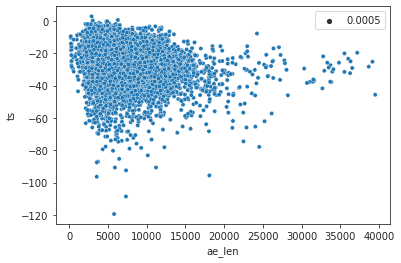

In [36]:
sns.scatterplot(data = ae_df, x = 'ae_len', y = 'ts', size = 0.0005)
## if len goes up, ts should go down?
## this is roughly the case

In [66]:
ae_335 = ae_df[ae_df['bID'] == 'B336']

In [67]:
### Out of 10499 bouts, how many are significantly multifractal?
np.unique(ae_335['sig'].values, return_counts = True)

(array([False,  True]), array([ 34, 329]))

<AxesSubplot:xlabel='ae_len', ylabel='ts'>

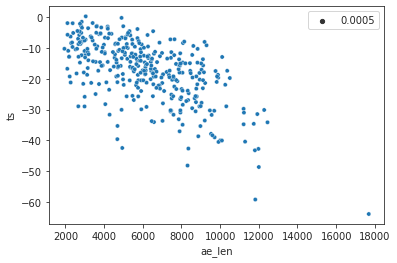

In [68]:
sns.scatterplot(data = ae_335, x = 'ae_len', y = 'ts', size = 0.0005)
## if len goes up, ts should go down?
## this is roughly the case

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [54]:
md = smf.mixedlm('ae_len ~ ts', ae_df, groups = ae_df['bID'])

In [55]:
mdf = md.fit()

/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


In [56]:
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  ae_len       
No. Observations:  10499    Method:              REML         
No. Groups:        14       Scale:               11016702.6619
Min. group size:   223      Log-Likelihood:      -100040.9643 
Max. group size:   1939     Converged:           Yes          
Mean group size:   749.9                                      
--------------------------------------------------------------
             Coef.    Std.Err.    z    P>|z|  [0.025   0.975] 
--------------------------------------------------------------
Intercept    6335.986  393.603  16.097 0.000 5564.539 7107.434
ts            -50.101    3.150 -15.906 0.000  -56.274  -43.927
Group Var 2063882.981  321.710                                



In [57]:
## filter so that only certain lengths can come through (~20 seconds / 4000 points with 200 SR)

In [58]:
ae_335 = ae_335[(ae_335['ae_len'] > 3750) & (ae_335['ae_len'] < 4250)]

In [59]:
mono_335 = ae_335[ae_335['sig'] == False].sort_values(by = 'ts', ascending = False)[0:6]
high_335 = ae_335[ae_335['sig'] == True].sort_values(by = 'ts', ascending = True)[0:6]

In [60]:
ae_335['t_rank'] = ae_335['ts'].rank(pct = True)

In [61]:
mid_335 = ae_335[(ae_335['t_rank'] > 0.05) & (ae_335['t_rank'] < 0.1)].sort_values(by = 'ts', ascending = True)[:10]

In [62]:
# save

In [ ]:
mono335_wav_paths = []
mid335_wav_paths = []
high335_wav_paths = []

for wav in mono_335.wav_file.values:
    mono335_wav_paths.append(list(Path(DATA_DIR).rglob(wav))[0])
    
for wav in mid_335.wav_file.values:
    mid335_wav_paths.append(list(Path(DATA_DIR).rglob(wav))[0])

for wav in high_335.wav_file.values:
    high335_wav_paths.append(list(Path(DATA_DIR).rglob(wav))[0])

In [ ]:
from starling_rhythm.utils.audio import compact_support

In [ ]:
def save_stim(paths, foldernames = 'default'):
    for wav in paths:
        rate, data = scipy.io.wavfile.read(wav)
        
        ## do the same trimming procedure
        data = compact_support(data, stds = 1, buffer = 100)
        
        split_path = str(wav).split('/')
        filename = split_path[-1]
        filename = AUDIO_PATH / foldernames / filename
        ensure_dir(filename)
        scipy.io.wavfile.write(filename = filename, data = data, rate = rate)

In [ ]:
for paths, foldernames in zip(
    [mono335_wav_paths, mid335_wav_paths, high335_wav_paths], 
    ['mono335', 'mid335', 'high335']
):
    save_stim(paths, foldernames)